Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Alejandro Puerto"
COLLABORATORS = "Gonzalo Peraza, Antonio Cisneros, Roger Osalde, Mauricio Rosas"

---

In [2]:
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import cm

%qtconsole

# Discretization

In statistics and machine learning, discretization refers to the process of converting or partitioning continuous attributes, features or variables to discretized or nominal attributes/features/variables/intervals.Whenever continuous data is discretized, there is always some amount of discretization error. The goal is to reduce the amount to a level considered negligible for the modeling purposes at hand. Many machine learning algorithms are known to produce better models by discretizing continuous attributes.

In a supervised context, the performance of a particular discretization can be evaluated using class information. Many algorithms use this information to find the minimum number of partitions relative to some metric, such as mutual information. Among these methods we find  Fayyad & Irani's MDL method, CAIM, CACC, and Ameva.

When class information is not available, it becomes difficult to evaluate the partition. Typically data is discretized into partitions of K equal lengths/width (equal intervals) or K% of the total data (equal frequencies).

TODO: Discuss several recent unsupervised methods in the literature (papers available on bibliography folder).

## Test data

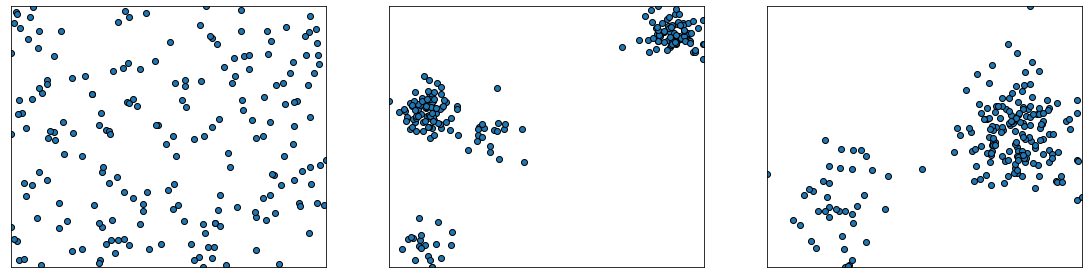

In [3]:
# taken from sklearn docs: https://scikit-learn.org/stable/auto_examples/preprocessing/plot_discretization_strategies.html#sphx-glr-auto-examples-preprocessing-plot-discretization-strategies-py

from sklearn.datasets import make_blobs

n_samples = 200
centers_0 = np.array([[0, 0], [0, 5], [2, 4], [8, 8]])
centers_1 = np.array([[0, 0], [3, 1]])

random_state = 42
X_list = [
    np.random.RandomState(random_state).uniform(-3, 3, size=(n_samples, 2)),
    make_blobs(n_samples=[n_samples // 10, n_samples * 4 // 10,
                          n_samples // 10, n_samples * 4 // 10],
               cluster_std=0.5, centers=centers_0,
               random_state=random_state)[0],
    make_blobs(n_samples=[n_samples // 5, n_samples * 4 // 5],
               cluster_std=0.5, centers=centers_1,
               random_state=random_state)[0],
]

figure = plt.figure(figsize=(6.4*3, 4.8))
for idx, X in enumerate(X_list):
    ax = plt.subplot(1, len(X_list), idx+1)
    ax.scatter(X[:, 0], X[:, 1], edgecolors='k')
    
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_xlim(np.min(X[:,0]), np.max(X[:,0]))
    ax.set_ylim(np.min(X[:,1]), np.max(X[:,1]))

## Equal width and frequency
In both methods, arity k is used to determine the number
of bins. Each bin is associated with a distinct discrete value. In equal-width, the continuous
range of a feature is evenly divided into intervals that have an equal-width and each interval
represents a bin. In equal-frequency, an equal number of continuous values are placed in
each bin.

The two methods are very simple but are sensitive for a given k (number of bins). For equal-frequency,
for instance, many occurrences of a continuous value could cause the occurrences to be
assigned into different bins. One improvement can be after continuous values are assigned
into bins, boundaries of every pair of neighboring bins are adjusted so that duplicate values
should belong to one bin only. Another problem is outliers that take extreme values. One
solution can be to remove the outliers using a threshold.

### Equal width

In [4]:
def disc_eq_width(X, k):
    # Implement equal width discretization with k bins.
    # Each feature should be discretized individually (univariate discretization).
    # Your code should work with a data matrix X with an arbitrary number of unsorted features.
    
    m, n = X.shape
        
    # Find class limits.
    # Hint: use -inf and +inf as the first and last limit
    # YOUR CODE HERE
    
    clims = np.linspace(X.min(axis=0), X.max(axis=0), k+1, axis=1)
    clims[:,0] = -np.inf
    clims[:,-1] = np.inf
    
    #raise NotImplementedError()
    
    X_disc = np.zeros(X.shape)
    for i in range(n):
        # YOUR CODE HERE
        X_disc[:,i] = np.searchsorted(clims[i], X[:,i], side='right') - 1
        #raise NotImplementedError()
        
    # Return the discretized labels in a matrix the same shape as X.
    # Return the limits in a matrix which rows are the interval classes of each feature.
    return X_disc, clims

To test the function employ the following test matrix:

In [5]:
X_test = np.array([[-2, 1, -4,   -1],
                   [-1, 2, -3, -0.5],
                   [ 0, 3, -2,  0.5],
                   [ 1, 4, -1,    2]])

X_disc, bin_edges = disc_eq_width(X_test, 3)

print("The discretized matrix is:")
print(X_disc)
print("Expected answer:")
print("""[[0. 0. 0. 0.]
 [1. 1. 1. 0.]
 [2. 2. 2. 1.]
 [2. 2. 2. 2.]]""")
print()

print("The bin edges are:")
print(bin_edges)
print("Expected edges:")
print("""[[-inf  -1.   0.  inf]
 [-inf   2.   3.  inf]
 [-inf  -3.  -2.  inf]
 [-inf   0.   1.  inf]]
""")


The discretized matrix is:
[[0. 0. 0. 0.]
 [1. 1. 1. 0.]
 [2. 2. 2. 1.]
 [2. 2. 2. 2.]]
Expected answer:
[[0. 0. 0. 0.]
 [1. 1. 1. 0.]
 [2. 2. 2. 1.]
 [2. 2. 2. 2.]]

The bin edges are:
[[-inf  -1.   0.  inf]
 [-inf   2.   3.  inf]
 [-inf  -3.  -2.  inf]
 [-inf   0.   1.  inf]]
Expected edges:
[[-inf  -1.   0.  inf]
 [-inf   2.   3.  inf]
 [-inf  -3.  -2.  inf]
 [-inf   0.   1.  inf]]



The following code plots the sample data sets and the equal width partition:

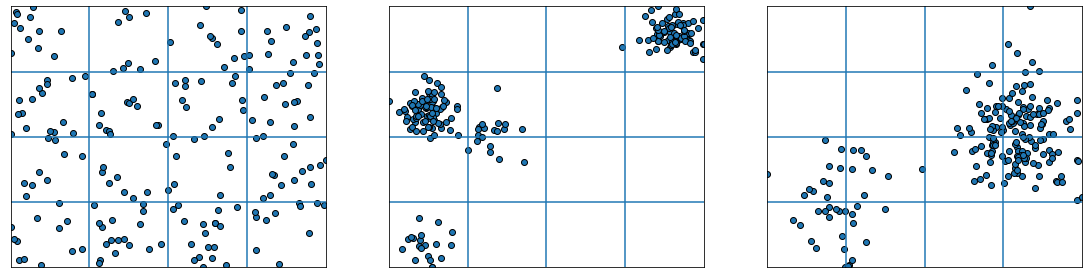

In [6]:
bin_edges = [disc_eq_width(X, 4)[1][:,1:-1] for X in X_list]

figure = plt.figure(figsize=(6.4*3, 4.8))
for idx, X in enumerate(X_list):
    ax = plt.subplot(1, len(X_list), idx+1)
    ax.scatter(X[:, 0], X[:, 1], edgecolors='k')
    
    ax.set_xlim(np.min(X[:,0]), np.max(X[:,0]))
    ax.set_ylim(np.min(X[:,1]), np.max(X[:,1]))
    
    for x in bin_edges[idx][0]:
        ax.axvline(x)
    for y in bin_edges[idx][1]:
        ax.axhline(y)
    
    ax.set_xticks(())
    ax.set_yticks(())

### Equal frecuency

In [7]:
def disc_eq_freq(X, k):
    # Implement equal frequency discretization with k bins.
    # Each feature should be discretized individually (univariate discretization).
    # Your code should work with a data matrix X with an arbitrary number of unsorted features.
    
    m, n = X.shape
    
    # Find class limits.
    # Hint: use -inf and +inf as the first and last limit
    # YOUR CODE HERE
    quantiles = np.linspace(0, 100, k+1)
    clims = np.asarray(np.percentile(X, quantiles, axis = 0))
    clims = np.transpose(clims)
    clims[:,0] = -np.Inf
    clims[:,-1] = np.Inf
    #raise NotImplementedError()
    
    X_disc = np.zeros(X.shape)
    for i in range(n):
        # YOUR CODE HERE
        X_disc[:,i] = np.searchsorted(clims[i], X[:,i], side='right') - 1
        #raise NotImplementedError()
        
    # Return the discretized labels in a matrix the same shape as X.
    # Return the limits in a matrix which rows are the interval classes of each feature.
    return X_disc, clims

To test the function employ the following test matrix:

In [8]:
X_test = np.array([[-2, 1, -4,   -1],
                   [-1, 2, -3, -0.5],
                   [ 0, 3, -2,  0.5],
                   [ 1, 4, -1,    2]])

X_disc, bin_edges = disc_eq_freq(X_test, 4)

print("The discretized matrix is:")
print(X_disc)
print("Expected answer:")
print("""[[0. 0. 0. 0.]
 [1. 1. 1. 1.]
 [2. 2. 2. 2.]
 [3. 3. 3. 3.]]""")
print()

print("The bin edges are:")
print(bin_edges)
print("Expected edges:")
print("""[[  -inf -1.25  -0.5    0.25     inf]
 [  -inf  1.75   2.5    3.25     inf]
 [  -inf -3.25  -2.5   -1.75     inf]
 [  -inf -0.625  0.     0.875    inf]]
""")


The discretized matrix is:
[[0. 0. 0. 0.]
 [1. 1. 1. 1.]
 [2. 2. 2. 2.]
 [3. 3. 3. 3.]]
Expected answer:
[[0. 0. 0. 0.]
 [1. 1. 1. 1.]
 [2. 2. 2. 2.]
 [3. 3. 3. 3.]]

The bin edges are:
[[  -inf -1.25  -0.5    0.25     inf]
 [  -inf  1.75   2.5    3.25     inf]
 [  -inf -3.25  -2.5   -1.75     inf]
 [  -inf -0.625  0.     0.875    inf]]
Expected edges:
[[  -inf -1.25  -0.5    0.25     inf]
 [  -inf  1.75   2.5    3.25     inf]
 [  -inf -3.25  -2.5   -1.75     inf]
 [  -inf -0.625  0.     0.875    inf]]



The following code plots the sample data sets and the equal frequency partition:

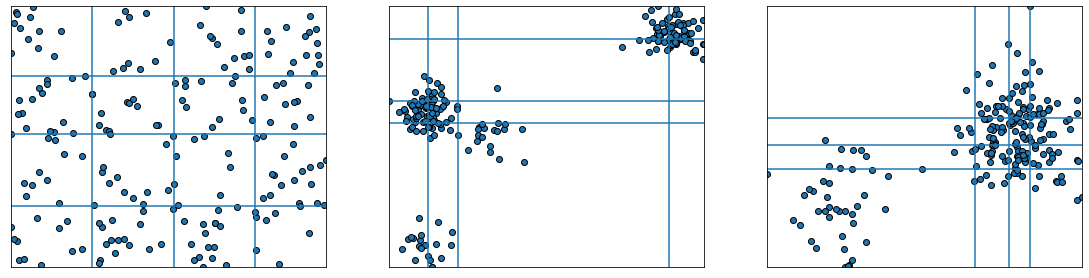

In [9]:
bin_edges = [disc_eq_freq(X, 4)[1][:,1:-1] for X in X_list]

figure = plt.figure(figsize=(6.4*3, 4.8))
for idx, X in enumerate(X_list):
    ax = plt.subplot(1, len(X_list), idx+1)
    ax.scatter(X[:, 0], X[:, 1], edgecolors='k')
    
    ax.set_xlim(np.min(X[:,0]), np.max(X[:,0]))
    ax.set_ylim(np.min(X[:,1]), np.max(X[:,1]))
    
    for x in bin_edges[idx][0]:
        ax.axvline(x)
    for y in bin_edges[idx][1]:
        ax.axhline(y)
    
    ax.set_xticks(())
    ax.set_yticks(())

Equal-width and equal-frequency are simple and easy to implement.
This does not come without a price. First, arity k has to be specified beforehand. Because we
usually do not know what a proper value k is, we need to resort to trial-and-error or specify
a value randomly.

Both this methods are implemented in the sklearn preprocessing module, in the KBinsDiscretizer method. KBinsDiscretizer performs extra safety checks, so should be preferred in production. Refer to: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.KBinsDiscretizer.html

## Discretization by clustering

Discretizing a data set is similar to the clustering problem in the sense that we are looking for partitions with large within-class similarity and small intra-class similarity. 

One way to discretize a feature matrix is to apply a clustering algorithm to each individual feature. In the following we will implement discretization via the K-Means clustering algorithm. Since we have not yet implemented our own version of K.mean( wait until unit 3), we'll follow a method proposed Daniel Joita in UNSUPERVISED STATIC DISCRETIZATION METHODS IN DATA MINING to cluster one dimensional features.

The idea of the algorithm is to chose initial centers such that they are in increasing order. In this way, the
recomputed centers are also in increasing order and therefore to determine the closest cluster for each value of
the attribute A the algorithm does less comparisons than in the general case. The closest cluster either remains
the one in which the value belongs to or it is one of the two neighbouring clusters. In this way the number of
comparisons done for reallocation of cluster is no longer k but 3. Also there is no need to order all the values in
adom(A) like in the case of equal- frequency interval discretization.

The cut points are defined as the minimum and maximum of the active domain of the attribute and the
midpoints between the centers of the clusters.

We start by implementing 1D K means:

In [10]:
def k_means_1D(x, k):
    """ Implmentes K-means discretization.
    
    INPUT:
        x: one dimensional numpy array with the features to discretize
        k: number of bins
        
    OUTPUT:
        b: the bin edges
    """
    n = len(x)
    x = np.array(x)
    
    # We need an array for the cluster index of each point
    cluster = np.zeros(n, dtype=int)
    
    # Bin edges
    b = np.zeros(k + 1)
    
    # This variable monitors the reallocation of clusters.
    # change = true if at least one value is being moved to a different cluster.
    change = False
    
    # Initialize cluster centers to first unique k elements in x
    C = []
    for e in x:
        if e in C:
            continue
        C.append(e)
        if len(C) == k:
            break
    C = np.sort(C)
    if len(C) < k:
        assert "Error, not enough unique centers."
        
    # initialize bin edges
    b[0] = -np.inf
    b[-1] = np.inf
    b[1:-1] = (C[1:] + C[:-1])/2
    
    # Assign cluster index in cluster list
    # YOUR CODE HERE
    for i, ai in enumerate(x):
        for j in range(k):
            if ai < b[j + 1]:
                cluster[i] = j
                break
                
    #raise NotImplementedError()
    
    # Iteration
    change = True
    while change:
        change = False
        # Recompute the centers of the clusters as 
        # the average of the values in each cluster.
        # YOUR CODE HERE
        for i in range(k):
            C[i] = np.mean(x[cluster == i])
        for i, ai in enumerate(x):
            j = cluster[i]
            #Find the closest cluster  to xi from the possible clusters {j-1, j, j+1}
            if (j>0) and (ai < C[j]) and (ai - C[j-1] < C[j] - ai):
                cluster[i] = j - 1
                change = True
            elif (j < k - 1) and (ai > C[j]) and (C[j+1] - ai < ai - C[j]):
                cluster[i] = j + 1
                change = True
        
        #raise NotImplementedError()
        
    # Determination of the cut points
    b[0] = x.min()
    b[-1] = x.max()
    b[1:-1] = (C[1:] + C[:-1])/2
    
    return b

In [11]:
def disc_k_means(X, k):
    """ Implmentes K-means discretization.
    
    INPUT:
        X: data matrix as a numpy array
        k: number of bins
    """
    m, n = X.shape
    X_disc = np.zeros(X.shape)
    clims = []
    
    for i in range(n):
        bin_edges = k_means_1D(X[:,i], k)
        bin_edges[0] = -np.inf
        bin_edges[-1] = np.inf
        clims.append(list(bin_edges))
        X_disc[:,i] = np.searchsorted(bin_edges, X[:,i], side='right') - 1
        
    return X_disc, np.array(clims)

To test the function employ the following test matrix:

In [12]:
X_test = np.array([[-2, 1, -4,   -1],
                   [-1, 2, -3, -0.5],
                   [ 0, 3, -2,  0.5],
                   [ 1, 4, -1,    2]])

X_disc, bin_edges = disc_k_means(X_test, 4)

print("The discretized matrix is:")
print(X_disc)
print("Expected answer:")
print("""[[0. 0. 0. 0.]
 [1. 1. 1. 1.]
 [2. 2. 2. 2.]
 [3. 3. 3. 3.]]""")
print()

print("The bin edges are:")
print(bin_edges)
print("Expected edges:")
print("""[[ -inf -1.5  -0.5   0.5    inf]
 [ -inf  1.5   2.5   3.5    inf]
 [ -inf -3.5  -2.5  -1.5    inf]
 [ -inf -0.75  0.    1.25   inf]]
""")


The discretized matrix is:
[[0. 0. 0. 0.]
 [1. 1. 1. 1.]
 [2. 2. 2. 2.]
 [3. 3. 3. 3.]]
Expected answer:
[[0. 0. 0. 0.]
 [1. 1. 1. 1.]
 [2. 2. 2. 2.]
 [3. 3. 3. 3.]]

The bin edges are:
[[ -inf -1.5  -0.5   0.5    inf]
 [ -inf  1.5   2.5   3.5    inf]
 [ -inf -3.5  -2.5  -1.5    inf]
 [ -inf -0.75  0.    1.25   inf]]
Expected edges:
[[ -inf -1.5  -0.5   0.5    inf]
 [ -inf  1.5   2.5   3.5    inf]
 [ -inf -3.5  -2.5  -1.5    inf]
 [ -inf -0.75  0.    1.25   inf]]



The following code plots the sample data sets with the found partitions:

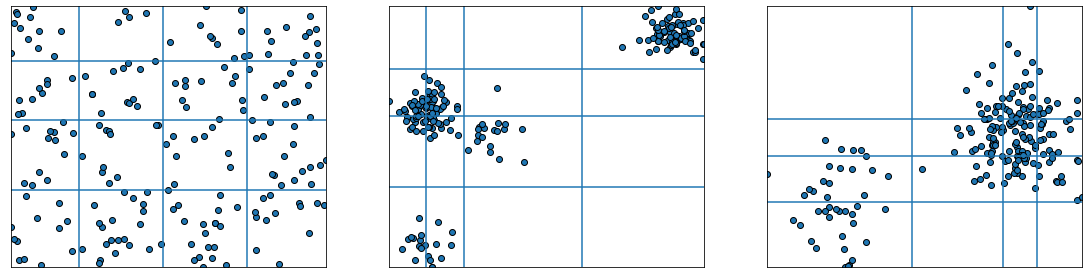

In [13]:
bin_edges = [disc_k_means(X, 4)[1][:,1:-1] for X in X_list]

figure = plt.figure(figsize=(6.4*3, 4.8))
for idx, X in enumerate(X_list):
    ax = plt.subplot(1, len(X_list), idx+1)
    ax.scatter(X[:, 0], X[:, 1], edgecolors='k')
    
    ax.set_xlim(np.min(X[:,0]), np.max(X[:,0]))
    ax.set_ylim(np.min(X[:,1]), np.max(X[:,1]))
    
    for x in bin_edges[idx][0]:
        ax.axvline(x)
    for y in bin_edges[idx][1]:
        ax.axhline(y)
    
    ax.set_xticks(())
    ax.set_yticks(())

## Kernel density estimation

Kernel density estimation is a univariate non-parametric probability density estimation method. It estimates the probability density at point $x$ through the kernel density function:

$$
p(x) = \frac{1}{nh}\sum_{i=1}^n K\left( \frac{x- X_i}{h}  \right)
$$
where the kernel K is a weighting function, the $X_i$ are the $n$ available data points, and $h$ is the kernel bandwidth, a hyper-parameter. It is essentially a weighted average, where the weights are given by the kernel function. Each point contributes to the density depending on its distance from $x$. The kernel must be a positive function that integrates to 1. The choice of the bandwidth is crucial and heavily influences the results. Intuitively one wants to choose $h$ as small as the data will allow; however, there is always a trade-off between the bias of the estimator and its variance. While methods have been proposed for bandwidth selection, a simple yet good performing one is k-fold cross-validation.

Here we will employ KDE as a non-parametric unsupervised discretizing method. First, we find the best kernel density estimate for each row of the data using CV. Then, we select the cut-points at the local minima of the KDE.

In [14]:
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import KFold

def disc_kde_1D(x, plot=False):
    """ Implmentes KDE discretization.
    
    INPUT:
        x: one dimensional numpy array with the features to discretize
               
    OUTPUT:
        b: the bin edges
    """
    
    n = len(x)
    x = np.array(x)
    x.sort()
    
    # Select an appropiate bw candidates
    xmin = x[0]
    xmax = x[-1]
    xrange = xmax - xmin
    bw_l = np.linspace(0.01*xrange, xrange, 100)
    bw_scores = np.zeros(len(bw_l))
    
    # Use 10-fold CV. Find the corresponding train and test for each fold.
    # Note: Since x is ordered, maybe systematic sampling would give better cv results.
    folds = list(KFold(n_splits=10, shuffle=True).split(x))
    for i, bw in enumerate(bw_l):
        # YOUR CODE HERE
        score = 0
        for train, test in folds:
            kde = KernelDensity(bandwidth = bw, kernel = 'gaussian')
            kde = kde.fit(x[train].reshape(-1, 1))
            score = score + kde.score(x[test].reshape(-1,1))
        score = score/10
        bw_scores[i] = score
        #raise NotImplementedError()
    # It seems the best bw benefits from some smoothing, need to explore this more, systematic sampling may solve this.
    best_bw = 1.5*bw_l[np.argmax(bw_scores)]
        
    
    # List to store bin edges
    bin_edges = [xmin]
    
    # Find local minima using a grid, other option is to use data poitns.
    grid_x = np.linspace(xmin, xmax, 100)
    kde_full = KernelDensity(bandwidth=best_bw, kernel='gaussian').fit(x.reshape(-1,1)).score_samples(grid_x.reshape(-1,1))
    
    for i in range(1, len(kde_full) - 1):
        # YOUR CODE HERE
        if (kde_full[i] < kde_full[i-1]) and (kde_full[i] < kde_full[i+1]):
            bin_edges.append(grid_x[i])
        #raise NotImplementedError()
    bin_edges.append(xmax)
    
    return np.array(bin_edges)  

In [15]:
def disc_kde(X):
    m, n = X.shape
    X_disc = np.zeros(X.shape)
    clims = []
    
    for i in range(n):
        bin_edges = disc_kde_1D(X[:,i])
        bin_edges[0] = -np.inf
        bin_edges[-1] = np.inf
        clims.append(bin_edges)
        X_disc[:,i] = np.searchsorted(bin_edges, X[:,i], side='right') - 1
    
    # Now clims cannot be an array, since there is no guarante
    # that all features will have the same number of bins    
    return X_disc, clims

To test the function employ the following test matrix:

In [16]:
X_test = np.array([[-2, 1, -4,   -1],
                   [-1, 2, -3, -0.5],
                   [ 0, 3, -2,  0.5],
                   [ 1, 4, -1,    2],
                   [-2.1, 1.1, -4.1,   -1.1],
                   [-1.1, 2.1, -3.1, -0.6],
                   [ 0.1, 3.1, -2.1,  0.6],
                   [ 1.1, 4.1, -1.1,    2.1],
                   [-2.2, 1.2, -4.2,   -1.2],
                   [-1.2, 2.2, -3.2, -0.7],
                   [ 0.2, 3.2, -2.2,  0.7],
                   [ 1.2, 4.2, -1.2,    2.2]])

X_disc, bin_edges = disc_kde(X_test)

print("The discretized matrix is:")
print(X_disc)
print("Expected answer:")
print("""[[0. 0. 0. 0.]
 [1. 1. 1. 1.]
 [1. 1. 1. 2.]
 [2. 2. 2. 3.]
 [0. 0. 0. 0.]
 [1. 1. 1. 1.]
 [1. 1. 1. 2.]
 [2. 2. 2. 3.]
 [0. 0. 0. 0.]
 [1. 1. 1. 1.]
 [1. 1. 1. 2.]
 [2. 2. 2. 3.]]""")
print()

print("The bin edges are:")
for b in bin_edges:
    print(b)
print("Expected edges:")
print("""[       -inf -1.61616162  0.61616162         inf]
[      -inf 1.61414141 3.58585859        inf]
[       -inf -3.58585859 -1.61414141         inf]
[       -inf -0.85656566  0.0020202   1.34141414         inf]
""")


The discretized matrix is:
[[0. 0. 0. 0.]
 [1. 1. 1. 1.]
 [1. 1. 1. 2.]
 [2. 2. 2. 3.]
 [0. 0. 0. 0.]
 [1. 1. 1. 1.]
 [1. 1. 1. 2.]
 [2. 2. 2. 3.]
 [0. 0. 0. 0.]
 [1. 1. 1. 1.]
 [1. 1. 1. 2.]
 [2. 2. 2. 3.]]
Expected answer:
[[0. 0. 0. 0.]
 [1. 1. 1. 1.]
 [1. 1. 1. 2.]
 [2. 2. 2. 3.]
 [0. 0. 0. 0.]
 [1. 1. 1. 1.]
 [1. 1. 1. 2.]
 [2. 2. 2. 3.]
 [0. 0. 0. 0.]
 [1. 1. 1. 1.]
 [1. 1. 1. 2.]
 [2. 2. 2. 3.]]

The bin edges are:
[       -inf -1.61616162  0.61616162         inf]
[      -inf 1.61414141 3.58585859        inf]
[       -inf -3.58585859 -1.61414141         inf]
[       -inf -0.85656566  0.0020202   1.34141414         inf]
Expected edges:
[       -inf -1.61616162  0.61616162         inf]
[      -inf 1.61414141 3.58585859        inf]
[       -inf -3.58585859 -1.61414141         inf]
[       -inf -0.85656566  0.0020202   1.34141414         inf]



The following code plots the sample data sets with the found partitions:

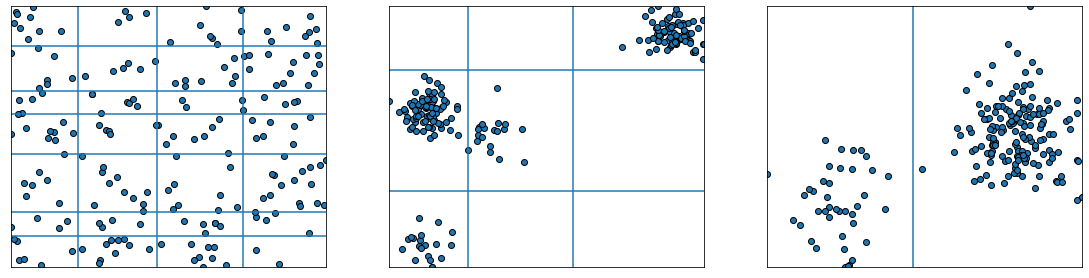

In [17]:
bin_edges = [disc_kde(X)[1] for X in X_list]

figure = plt.figure(figsize=(6.4*3, 4.8))
for idx, X in enumerate(X_list):
    ax = plt.subplot(1, len(X_list), idx+1)
    ax.scatter(X[:, 0], X[:, 1], edgecolors='k')
    
    ax.set_xlim(np.min(X[:,0]), np.max(X[:,0]))
    ax.set_ylim(np.min(X[:,1]), np.max(X[:,1]))
    
    for x in bin_edges[idx][0][1:-1]:
        ax.axvline(x)
    for y in bin_edges[idx][1][1:-1]:
        ax.axhline(y)
    
    ax.set_xticks(())
    ax.set_yticks(())

### References

- https://en.wikipedia.org/wiki/Discretization_of_continuous_features
- Discretization: An Enabling Technique, Liu et. al.
- UNSUPERVISED STATIC DISCRETIZATION METHODS IN DATA MINING, Daniela Joiţa
- https://en.wikipedia.org/wiki/Kernel_density_estimation